# Network creation

## Data exploration
Before creating the network, we need to explore the data to understand the structure of the dataset

In [1]:
import pandas as pd

patients = pd.read_csv("../dataset/dataset.csv")
patients.info()

symptoms = pd.read_csv("../dataset/Symptom-severity.csv")
symptoms = symptoms["Symptom"]
symptoms = symptoms.drop(symptoms[symptoms == "prognosis"].index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [2]:
patients.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [3]:
patients.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling missing values

In [4]:
patients.fillna(" ", inplace=True)
patients = patients.map(lambda x: x.replace(" ","") if isinstance(x, str) else x)

## One-hot encoding

In [5]:
import pandas as pd

# Assuming 'patients' is your DataFrame

# Extract symptoms
columns = [f"Symptom_{i}" for i in range(1, 18)]

# Create a new DataFrame for one-hot encoding with the 'Disease' column
one_hot_encoding = pd.get_dummies(patients[columns].stack(), prefix="", prefix_sep="")

# Sum the one-hot-encoded values grouped by the 'Disease' column
one_hot_encoding = one_hot_encoding.groupby(level=0).sum()

# Add the 'Disease' column to the new DataFrame
one_hot_encoding["Disease"] = patients["Disease"]

one_hot_encoding.to_csv("../dataset/one_hot_encoding.csv", index=False)



## Compute adjacency matrix

In [6]:
adjacency_matrix = one_hot_encoding.groupby("Disease").sum()

adjacency_matrix = adjacency_matrix.reset_index()
adjacency_matrix = adjacency_matrix.drop(["Disease", ""], axis=1)

adjacency_matrix = adjacency_matrix.apply(
    lambda x: x.map(lambda val: 1 if val != 0 else 0)
)
adjacency_matrix["Disease"] = one_hot_encoding["Disease"].unique()

adjacency_matrix.to_csv("../dataset/adjacency_matrix.csv", index=False)
adjacency_matrix.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungalinfection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Chroniccholestasis
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,DrugReaction


### Check if all symptoms are not lost 

In [7]:
columns= adjacency_matrix.columns[:-1].tolist()
symptoms= symptoms.unique().tolist()

difference = [item for item in symptoms if item not in adjacency_matrix.columns]
difference2 = [item for item in columns if item not in symptoms]

print(difference)
print(difference2)

print(len(columns))
print(len(symptoms))

[]
[]
131
131


## Compute the network

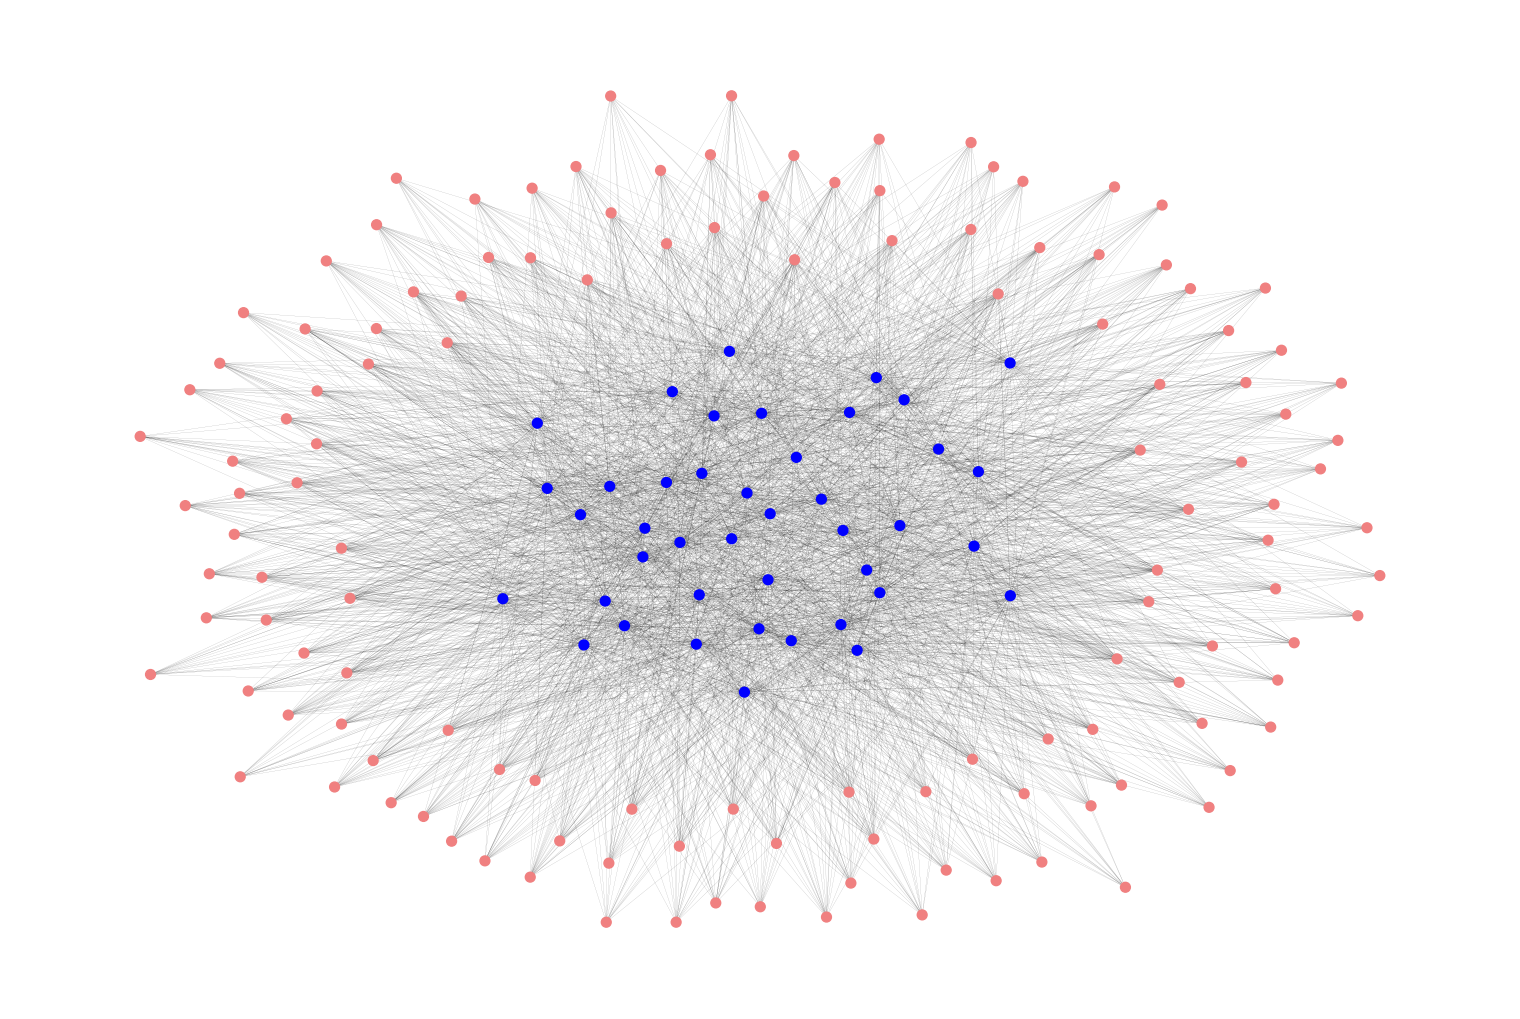

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have a 42x131 adjacency matrix named 'adjacency_matrix'
# Replace this with your actual adjacency matrix
adjacency_matrix = np.random.randint(2, size=(42, 131))

# Create a bipartite graph
G = nx.Graph()

# Add nodes to the graph
num_rows, num_cols = adjacency_matrix.shape
G.add_nodes_from(range(num_rows), bipartite=0)  # Nodes in the first partition
G.add_nodes_from(
    range(num_rows, num_rows + num_cols), bipartite=1
)  # Nodes in the second partition

# Add edges to the graph based on the adjacency matrix
for i in range(num_rows):
    for j in range(num_cols):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, num_rows + j)

# Calculate Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Draw the bipartite graph with Kamada-Kawai layout
plt.figure(figsize=(15, 10))  # Adjust the figure size

nx.draw(
    G,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=50,  # Adjust the node size
    width=0.05,  # Adjust the edge width
    node_color=["blue" if n in range(num_rows) else "lightcoral" for n in G.nodes],
)
plt.show()